In [1]:
import numpy as np
import matplotlib.pyplot as plt
from core.envs.grid_world import Grid_World
from core.rl_utils import *

State dimension: 2 
Number of actions: 4


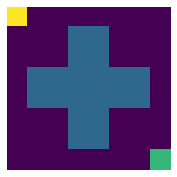

In [7]:
env = Grid_World()
env.reset()
env.render();
print('State dimension:', env.state_dim, '\nNumber of actions:', env.num_actions)

In [ ]:
class DQN():
    def __init__(self, state_dim, num_actions):
        self.input_dim = state_dim         # Input dimension
        self.output_dim = num_actions      # Output dimension
        self.learning_rate = 0.1           # Learning rate for SGD
        
        self.n1 = n1                       # Number of neurons in the first layer
        self.n2 = self.output_dim          # Number of neurons in the second layer
        
        self.W1 = np.random.normal(loc=0, scale=0.01, size=(self.n1, self.input_dim))  # Weights of the first layer
        self.b1 = np.zeros((self.n1, 1))                                               # Biases of the first layer
        self.W2 = np.random.normal(loc=0, scale=0.01, size=(self.n2, self.n1))         # Weights of the second layer
        self.b2 = np.zeros((self.n2, 1))                                               # Biases of the second layer
        
    def f2(self, q, compute_derivative=False): # Activation function of layer 2
        y = q                                  # Linear function
        dydq = 0                               # Default derivative
        if(compute_derivative):
            dydq = np.ones_like(q)             # Derivative computation
        return y, dydq
        
    def f1(self, q, compute_derivative=False): # Activation function of layer 1
        y = 1/(1 + np.exp(-q))                 # Sigmoid function
        dydq = 0                               # Default derivative
        if(compute_derivative):
            dydq = y*(1 - y)                   # Derivative computation
        return y, dydq

    def forward_pass(self, X, track_derivatives=False):     # track_derivatives must be True when training
        self.X_in = X.reshape(self.input_dim, -1)           # Check shape
        self.ones_batch = np.ones((self.X_in.shape[1], 1))  # Column vector of ones with the size of the input batch
        
        Q1 = np.dot(self.W1, self.X_in) + np.dot(self.b1, self.ones_batch.T)      # Linear combination in first layer 
        self.Y1, self.dY1dQ1 = self.f1(Q1, compute_derivative=track_derivatives)  # Output of the first layer
        
        Q2 = np.dot(self.W2, self.Y1) + np.dot(self.b2, self.ones_batch.T)        # Linear combination in second layer 
        self.Y2, self.dY2dQ2 = self.f2(Q2, compute_derivative=track_derivatives)  # Output of the second layer
        
        return self.Y2.copy() # Return the output of the network
        
    def backward_pass(self, initial_gradient): # Must be called after forward_pass()
        self.dLdY2 = initial_gradient.reshape(self.n2, -1)   # Check shape
        Phi2 = self.dLdY2 * self.dY2dQ2                      # Compute the Phi2 matrix      
        dLdY1 = np.dot(self.W2.T, Phi2)                      # Compute the dLdY1 matrix
        Phi1 = dLdY1 * self.dY1dQ1                           # Compute the Phi1 matrix
        
        self.dLdW1 = np.dot(Phi1, self.X_in.T)     # Compute derivatives of L w.r.t W1
        self.dLdb1 = np.dot(Phi1, self.ones_batch) # Compute derivatives of L w.r.t. b1
        self.dLdW2 = np.dot(Phi2, self.Y1.T)       # Compute derivatives of L w.r.t. W2
        self.dLdb2 = np.dot(Phi2, self.ones_batch) # Compute derivatives of L w.r.t. b2
        
    def update_parameters(self): # Applies one gradient descent step to the parameters
        batch_size = np.sum(self.ones_batch)                              # Compute the batch_size
        self.W1 = self.W1 - (self.learning_rate/batch_size) * self.dLdW1  # Update W1 using SGD
        self.b1 = self.b1 - (self.learning_rate/batch_size) * self.dLdb1  # Update b1 using SGD
        self.W2 = self.W2 - (self.learning_rate/batch_size) * self.dLdW2  # Update W2 using SGD
        self.b2 = self.b2 - (self.learning_rate/batch_size) * self.dLdb2  # Update b2 using SGD